In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import contourpy
from tqdm import tqdm
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.ticker import FormatStrFormatter
import numpy as np
from _FigureJiazeHelper import *
from _DetectabilityWithMeta import *
from _CommunityDetect import *
from EXPERIMENT import *

%load_ext autoreload
%autoreload 2

In [2]:
# Matplotlib settings

# plt.style.use('seaborn-whitegrid')
plt.rc('figure', figsize=(8, 5))
plt.rc('font', size=10)
plt.rc('font', family='sans-serif')
plt.rcParams['font.sans-serif'] = 'verdana'
plt.rcParams['lines.linewidth'] = 4
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.edgecolor'] = basic_line_color
plt.rcParams['xtick.color'] = basic_line_color
plt.rcParams['ytick.color'] = basic_line_color
plt.rcParams['axes.labelsize'] = 10  # 'large'
plt.rcParams['lines.markersize'] = 12
plt.rcParams['axes.linewidth'] = 0.5

# %matplotlib notebook
%config InlineBackend.figure_format = 'retina'

1


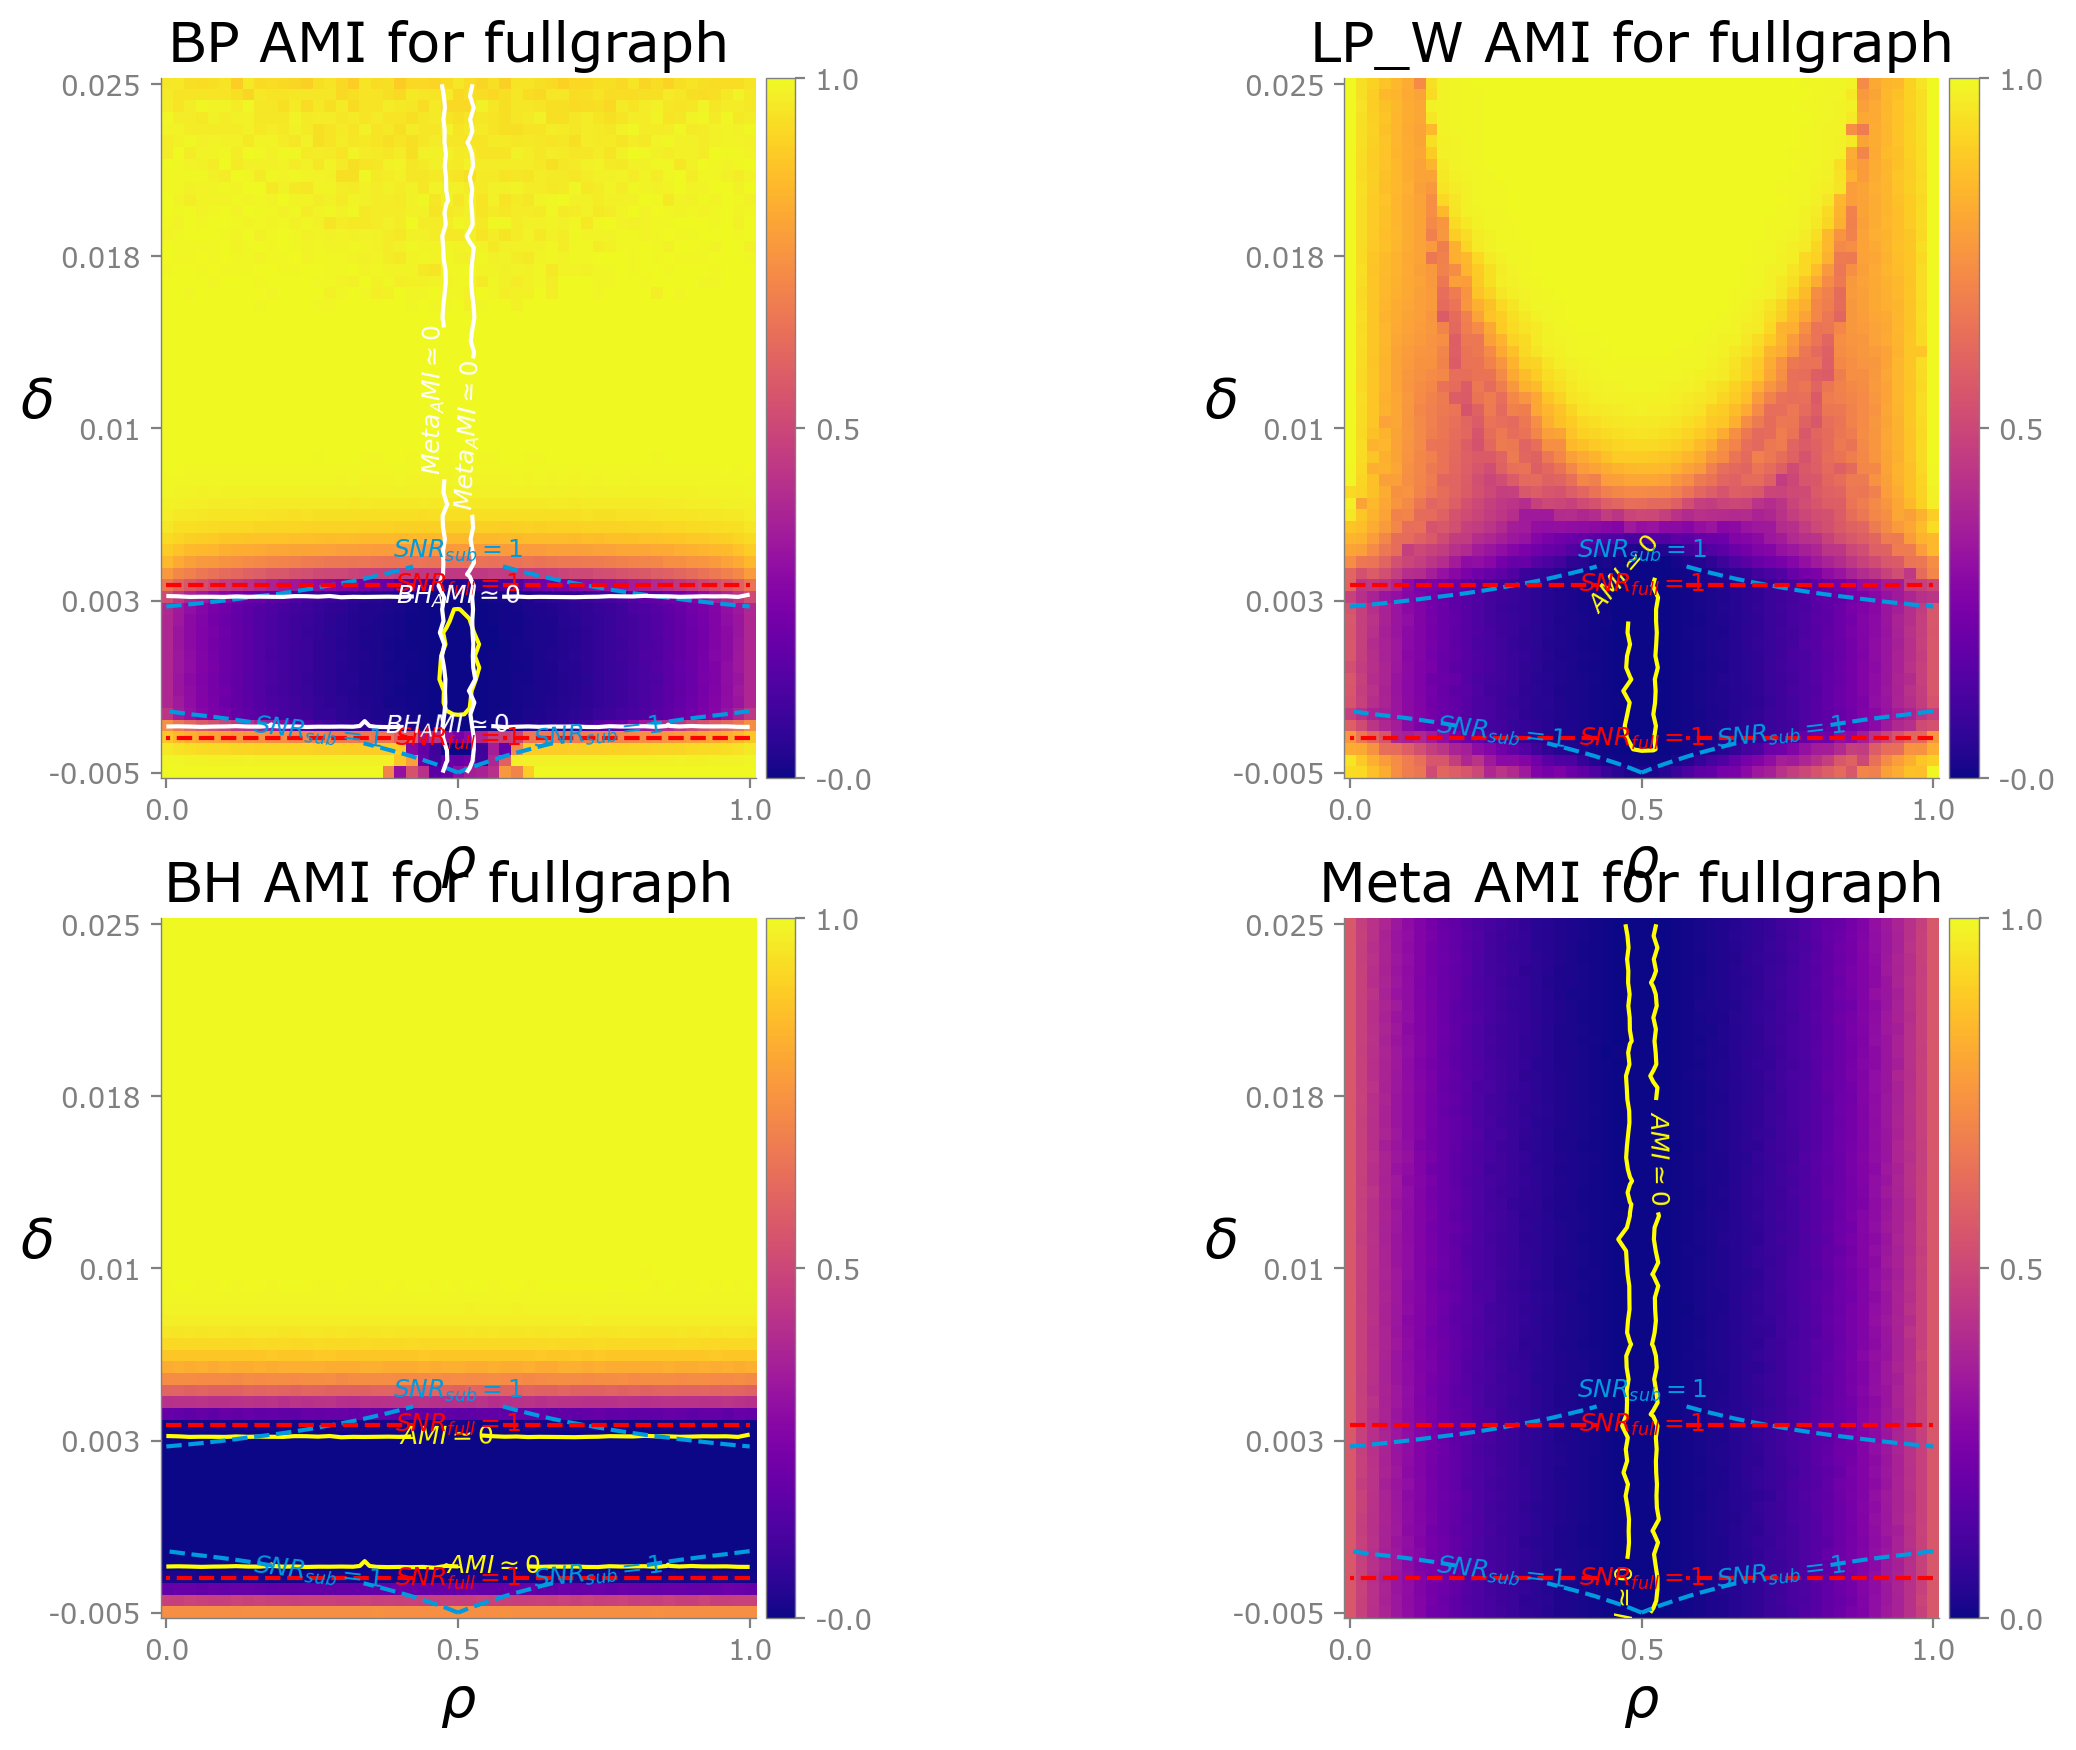

In [5]:
fig = plt.figure(figsize=(14, 10))
widths = [7, 7]
heights = [5, 5]
spec5 = fig.add_gridspec(ncols=2, nrows=2, width_ratios=widths, height_ratios=heights)
row = 0
col = 0
ax0 = fig.add_subplot(spec5[row, col])
# For big n
X = 2
Z = 3
n = X*Z*2000
d = 50
Withsnr = True
givenNumGroup = True
BP = True
fileId = 'amiExp11.14' + f'_n={n}_X={X}_Z={Z}_d={round(d)}_{"snr" if Withsnr else ""}_' + \
                 f'{"givenNumGroup" if givenNumGroup else ""}_' + \
                 f'{"BP" if BP else ""}_corrected'
load_path = "./result/detectabilityWithMeta/" + fileId + ".txt"
addload_path = None
plot_rhos, plot_zs, full_ami, sub_ami, snr_nm, snr_m, full_num_group, sub_num_group = read_exp(load_path=load_path, Withsnr=Withsnr, givenNumGroup=givenNumGroup, old=False, add_path=addload_path)
cmap = mpl.colormaps["plasma"]
zcenter = 0.5
plot_fullami = color_imshow_2d(plot_rhos, plot_zs, full_ami, z_center=zcenter, title="BP AMI for fullgraph ", xlabel=r'$\rho$', ylabel=r'$\delta$', cmap=cmap,  save_path=None, ax=ax0, fig=fig)
contour_data(plot_fullami, ax0, levels=[1e-3], fmt={1e-3: r'$AMI\simeq 0$'}, color='yellow')
plot_snrm = color_imshow_2d(plot_rhos, plot_zs, snr_m, z_center=1, return_gridz=True)
contour_data(plot_snrm, ax0, levels=[1], fmt={1: r'$SNR_{sub}=1$'}, color='#009ade', linestyle='dashed')
plot_snrnm = color_imshow_2d(plot_rhos, plot_zs, snr_nm, z_center=1, return_gridz=True)
contour_data(plot_snrnm, ax0, levels=[1], fmt={1: r'$SNR_{full}=1$'}, color='red', linestyle='dashed')

row = 0
col = 1
ax = fig.add_subplot(spec5[row, col])
# For big n
X = 2
Z = 3
N = X*Z*2000
d = 50
Withsnr = True
givenNumGroup = False
DC = False
HelpWithFull = False
LabelPropagate = True
fileId = 'amiExp11.18' + f'_n={N}_X={X}_Z={Z}_d={round(d)}_{"snr" if Withsnr else ""}_' \
                            f'{"givenNumGroup" if givenNumGroup else ""}_' \
                            f'{"DC" if DC else ""}_{"HelpWithFull" if HelpWithFull else ""}_' \
                            f'{"LabelPropagate" if LabelPropagate else ""}_somebaseon1sub_W2'
load_path = "./result/detectabilityWithMeta/" + fileId + ".txt"
plot_rhos, plot_zs, full_ami, sub_ami, snr_nm, snr_m, full_num_group, sub_num_group = read_exp(load_path=load_path, Withsnr=Withsnr, givenNumGroup=givenNumGroup, old=False)
cmap = mpl.colormaps["plasma"]
zcenter = 0.5
plot_fullami = color_imshow_2d(plot_rhos, plot_zs, sub_ami, z_center=zcenter, title="LP_W AMI for fullgraph ", xlabel=r'$\rho$', ylabel=r'$\delta$', cmap=cmap,  save_path=None, ax=ax, fig=fig)
contour_data(plot_fullami, ax, levels=[1e-3], fmt={1e-3: r'$AMI\simeq 0$'}, color='yellow')
contour_data(plot_snrm, ax, levels=[1], fmt={1: r'$SNR_{sub}=1$'}, color='#009ade', linestyle='dashed')
contour_data(plot_snrnm, ax, levels=[1], fmt={1: r'$SNR_{full}=1$'}, color='red', linestyle='dashed')

row = 1
col = 0
ax = fig.add_subplot(spec5[row, col])
cmap = mpl.colormaps["plasma"]
zcenter = 0.5
plot_fullami = color_imshow_2d(plot_rhos, plot_zs, full_ami, z_center=zcenter, title="BH AMI for fullgraph ", xlabel=r'$\rho$', ylabel=r'$\delta$', cmap=cmap,  save_path=None, ax=ax, fig=fig)
contour_data(plot_fullami, ax, levels=[1e-3], fmt={1e-3: r'$AMI\simeq 0$'}, color='yellow')
contour_data(plot_fullami, ax0, levels=[1e-3], fmt={1e-3: r'$BH_AMI\simeq 0$'}, color='white')
contour_data(plot_snrm, ax, levels=[1], fmt={1: r'$SNR_{sub}=1$'}, color='#009ade', linestyle='dashed')
contour_data(plot_snrnm, ax, levels=[1], fmt={1: r'$SNR_{full}=1$'}, color='red', linestyle='dashed')

row = 1
col = 1
ax = fig.add_subplot(spec5[row, col])
cmap = mpl.colormaps["plasma"]
zcenter = 0.5
plot_fullami = color_imshow_2d(plot_rhos, plot_zs, AMI_meta, z_center=zcenter, min_z=0, max_z=1, title="Meta AMI for fullgraph ", xlabel=r'$\rho$', ylabel=r'$\delta$', cmap=cmap,  save_path=None, ax=ax, fig=fig, vmax=1)
contour_data(plot_fullami, ax, levels=[1e-3], fmt={1e-3: r'$AMI\simeq 0$'}, color='yellow')
contour_data(plot_fullami, ax0, levels=[1e-3], fmt={1e-3: r'$Meta_AMI\simeq 0$'}, color='white')
contour_data(plot_snrm, ax, levels=[1], fmt={1: r'$SNR_{sub}=1$'}, color='#009ade', linestyle='dashed')
contour_data(plot_snrnm, ax, levels=[1], fmt={1: r'$SNR_{full}=1$'}, color='red', linestyle='dashed')

In [4]:
rho = np.setdiff1d(np.around(np.linspace(0, 1, 51), 2), np.array([])) 
delta = np.setdiff1d(np.around(np.linspace(-0.005, 0.025, int(0.03 / 0.0005)+1), 5), np.array([0]))
AMI_meta = np.zeros(np.size(delta)*np.size(rho))
i = 0
for _rho in tqdm(rho):
    for _delta in delta:
        pin = d / N + _delta * (1 - 1 / (X * Z))
        pout = d / N - _delta / (X * Z)
        pin = 0 if pin < 1e-10 else pin
        pout = 0 if pout < 1e-10 else pout
        msbm = SymMetaSBM(N, X, Z, _rho, pin, pout)
        AMI_meta[i] = adjusted_mutual_info_score(msbm.groupId, msbm.metaId)
        i+=1

  0%|                                                                                           | 0/51 [00:00<?, ?it/s]

Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata gen

  2%|█▌                                                                              | 1/51 [02:24<2:00:37, 144.76s/it]

Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata gen

  4%|███▏                                                                            | 2/51 [04:53<2:00:01, 146.97s/it]

Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata gen

  6%|████▋                                                                           | 3/51 [07:19<1:57:19, 146.65s/it]

Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata gen

  8%|██████▎                                                                         | 4/51 [09:33<1:50:59, 141.70s/it]

Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata gen

 10%|███████▊                                                                        | 5/51 [11:45<1:45:51, 138.07s/it]

Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata gen

 12%|█████████▍                                                                      | 6/51 [13:53<1:41:09, 134.87s/it]

Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata gen

 14%|██████████▉                                                                     | 7/51 [16:00<1:36:54, 132.14s/it]

Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata gen

 16%|████████████▌                                                                   | 8/51 [18:03<1:32:36, 129.23s/it]

Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata gen

 18%|██████████████                                                                  | 9/51 [20:03<1:28:31, 126.47s/it]

Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata gen

 20%|███████████████▍                                                               | 10/51 [22:00<1:24:27, 123.59s/it]

Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata gen

 22%|█████████████████                                                              | 11/51 [23:55<1:20:29, 120.75s/it]

Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata gen

 24%|██████████████████▌                                                            | 12/51 [25:46<1:16:40, 117.95s/it]

Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata gen

 25%|████████████████████▏                                                          | 13/51 [27:35<1:12:54, 115.12s/it]

Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata gen

 27%|█████████████████████▋                                                         | 14/51 [29:21<1:09:17, 112.36s/it]

Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata gen

 29%|███████████████████████▏                                                       | 15/51 [31:04<1:05:41, 109.50s/it]

Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata gen

 31%|████████████████████████▊                                                      | 16/51 [32:44<1:02:14, 106.70s/it]

Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata gen

 33%|███████████████████████████                                                      | 17/51 [34:21<58:52, 103.88s/it]

Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata gen

 35%|████████████████████████████▌                                                    | 18/51 [35:56<55:38, 101.17s/it]

Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata gen

 37%|██████████████████████████████▌                                                   | 19/51 [37:28<52:29, 98.42s/it]

Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata gen

 39%|████████████████████████████████▏                                                 | 20/51 [38:57<49:21, 95.53s/it]

Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata gen

 41%|█████████████████████████████████▊                                                | 21/51 [40:23<46:22, 92.75s/it]

Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata gen

 43%|███████████████████████████████████▎                                              | 22/51 [41:47<43:28, 89.93s/it]

Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata gen

 45%|████████████████████████████████████▉                                             | 23/51 [43:07<40:37, 87.04s/it]

Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata gen

 47%|██████████████████████████████████████▌                                           | 24/51 [44:25<37:54, 84.25s/it]

Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata gen

 49%|████████████████████████████████████████▏                                         | 25/51 [45:40<35:18, 81.50s/it]

Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata gen

 51%|█████████████████████████████████████████▊                                        | 26/51 [46:52<32:46, 78.67s/it]

Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata gen

 53%|███████████████████████████████████████████▍                                      | 27/51 [48:01<30:22, 75.94s/it]

Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata gen

 55%|█████████████████████████████████████████████                                     | 28/51 [49:08<28:01, 73.13s/it]

Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata gen

 57%|██████████████████████████████████████████████▋                                   | 29/51 [50:12<25:45, 70.25s/it]

Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata gen

 59%|████████████████████████████████████████████████▏                                 | 30/51 [51:12<23:36, 67.44s/it]

Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata gen

 61%|█████████████████████████████████████████████████▊                                | 31/51 [52:10<21:31, 64.59s/it]

Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata gen

 63%|███████████████████████████████████████████████████▍                              | 32/51 [53:05<19:33, 61.75s/it]

Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata gen

 65%|█████████████████████████████████████████████████████                             | 33/51 [53:58<17:40, 58.90s/it]

Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata gen

 67%|██████████████████████████████████████████████████████▋                           | 34/51 [54:47<15:53, 56.10s/it]

Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata gen

 69%|████████████████████████████████████████████████████████▎                         | 35/51 [55:34<14:12, 53.27s/it]

Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata gen

 71%|█████████████████████████████████████████████████████████▉                        | 36/51 [56:18<12:37, 50.49s/it]

Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata gen

 73%|███████████████████████████████████████████████████████████▍                      | 37/51 [56:59<11:08, 47.74s/it]

Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata gen

 75%|█████████████████████████████████████████████████████████████                     | 38/51 [57:37<09:43, 44.86s/it]

Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata gen

 76%|██████████████████████████████████████████████████████████████▋                   | 39/51 [58:13<08:24, 42.01s/it]

Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata gen

 78%|████████████████████████████████████████████████████████████████▎                 | 40/51 [58:45<07:10, 39.14s/it]

Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata gen

 80%|█████████████████████████████████████████████████████████████████▉                | 41/51 [59:15<06:03, 36.30s/it]

Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata gen

 82%|███████████████████████████████████████████████████████████████████▌              | 42/51 [59:42<05:01, 33.46s/it]

Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata gen

 84%|███████████████████████████████████████████████████████████████████▍            | 43/51 [1:00:06<04:04, 30.59s/it]

Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata gen

 86%|█████████████████████████████████████████████████████████████████████           | 44/51 [1:00:28<03:17, 28.27s/it]

Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata gen

 88%|██████████████████████████████████████████████████████████████████████▌         | 45/51 [1:00:47<02:31, 25.30s/it]

Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata gen

 90%|████████████████████████████████████████████████████████████████████████▏       | 46/51 [1:01:02<01:51, 22.35s/it]

Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata gen

 92%|█████████████████████████████████████████████████████████████████████████▋      | 47/51 [1:01:15<01:17, 19.40s/it]

Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata gen

 94%|███████████████████████████████████████████████████████████████████████████▎    | 48/51 [1:01:25<00:49, 16.55s/it]

Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata gen

 96%|████████████████████████████████████████████████████████████████████████████▊   | 49/51 [1:01:32<00:27, 13.66s/it]

Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata gen

 98%|██████████████████████████████████████████████████████████████████████████████▍ | 50/51 [1:01:36<00:10, 10.76s/it]

Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata generation done!
Metadata gen

100%|████████████████████████████████████████████████████████████████████████████████| 51/51 [1:01:37<00:00, 72.50s/it]

Metadata generation done!
Metadata generation done!
Metadata generation done!


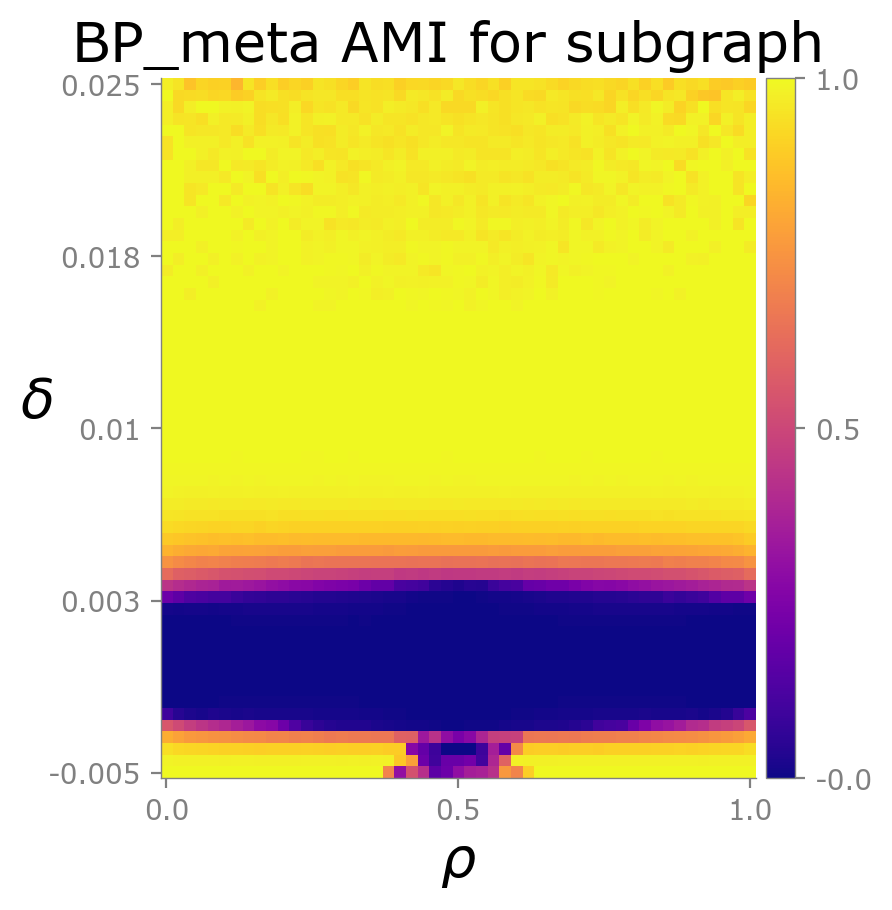

In [4]:
fig = plt.figure(figsize=(14, 10))
widths = [7, 7]
heights = [5, 5]
spec5 = fig.add_gridspec(ncols=2, nrows=2, width_ratios=widths, height_ratios=heights)
row = 0
col = 0
ax = fig.add_subplot(spec5[row, col])
X = 2
Z = 3
n = X*Z*2000
d = 50
Withsnr = True
givenNumGroup = True
BP = True
fileId = 'amiExp11.14' + f'_n={n}_X={X}_Z={Z}_d={round(d)}_{"snr" if Withsnr else ""}_' + \
                 f'{"givenNumGroup" if givenNumGroup else ""}_' + \
                 f'{"BP" if BP else ""}_corrected'
load_path = "./result/detectabilityWithMeta/" + fileId + ".txt"
addload_path = None
plot_rhos, plot_zs, full_ami, sub_ami, snr_nm, snr_m, full_num_group, sub_num_group = read_exp(load_path=load_path, Withsnr=Withsnr, givenNumGroup=givenNumGroup, old=False, add_path=addload_path)
cmap = mpl.colormaps["plasma"]
zcenter = 0.5
plot_subami = color_imshow_2d(plot_rhos, plot_zs, sub_ami, z_center=zcenter, title="BP_meta AMI for subgraph ", xlabel=r'$\rho$', ylabel=r'$\delta$', cmap=cmap,  save_path=None, ax=ax, fig=fig)

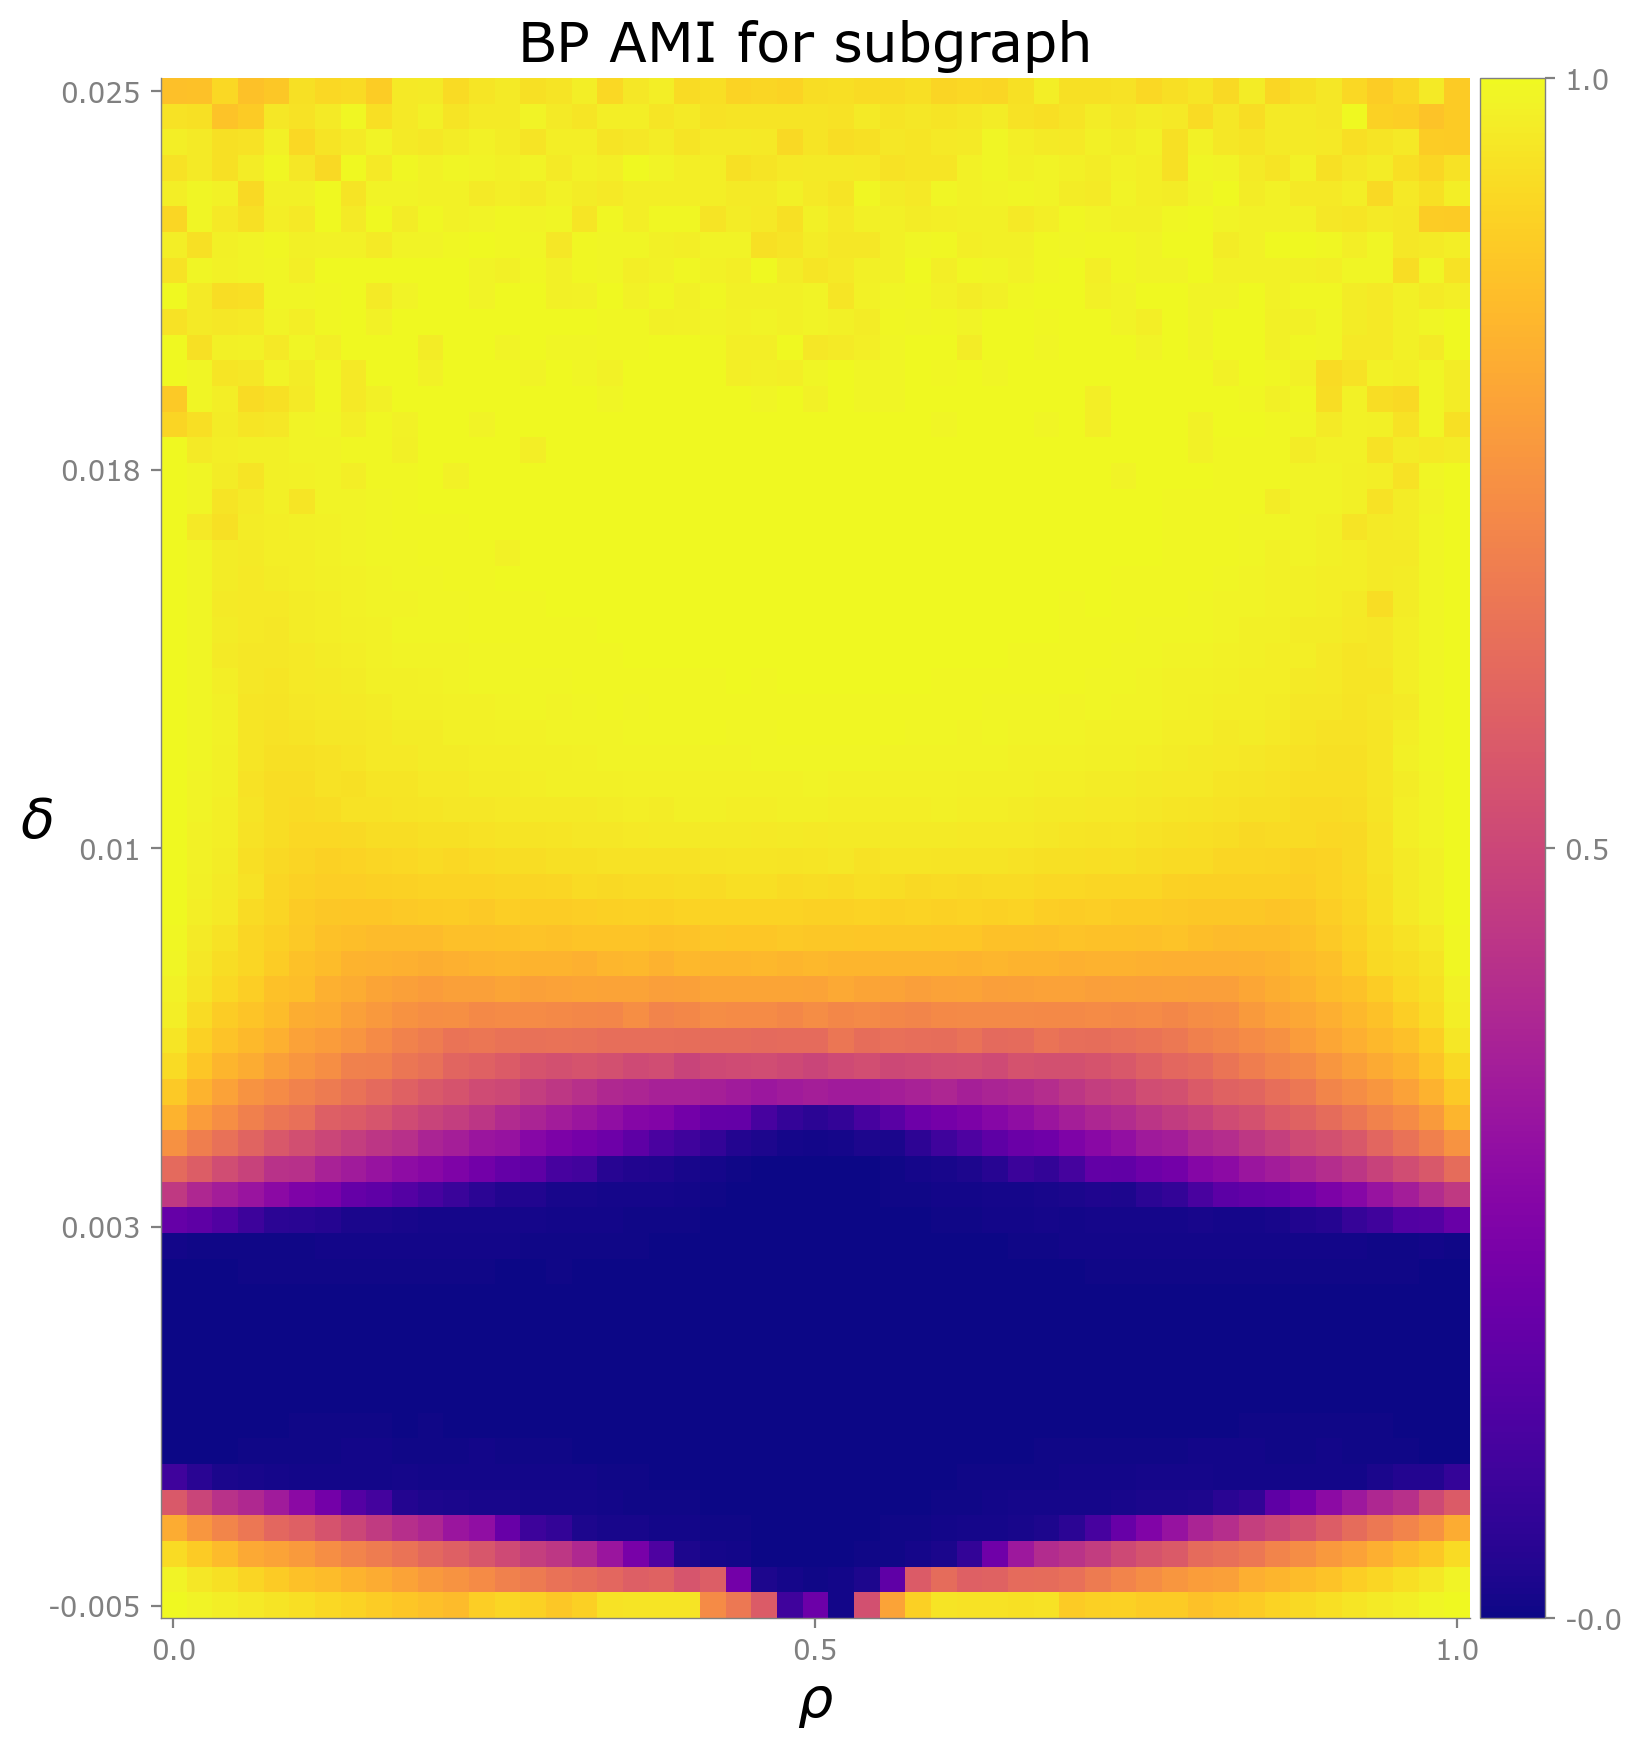

In [5]:
X = 2
Z = 3
n = X * Z * 2000  # 12000 nodes
d = 50
Withsnr = True
givenNumGroup = True
oriBP = True
multiprocessing = True
fileId = 'amiExp11.14' + f'_n={n}_X={X}_Z={Z}_d={round(d)}_{"snr" if Withsnr else ""}_' + \
             f'{"givenNumGroup" if givenNumGroup else ""}_' + \
             f'{"oriBP" if oriBP else ""}'
load_path = "./result/detectabilityWithMeta/" + fileId + ".txt"
addload_path = None
plot_rhos, plot_zs, full_ami, sub_ami, snr_nm, snr_m, full_num_group, sub_num_group = read_exp(load_path=load_path, Withsnr=Withsnr, givenNumGroup=givenNumGroup, old=False, add_path=addload_path)
cmap = mpl.colormaps["plasma"]
zcenter = 0.5
plot_fullami = color_imshow_2d(plot_rhos, plot_zs, sub_ami, z_center=zcenter, title="BP AMI for subgraph ", xlabel=r'$\rho$', ylabel=r'$\delta$', cmap=cmap,  save_path=None)